# Arbol de decision predecir precio de casas

In [7]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import random


## 1. Cargar Dataset

In [8]:

df = pd.read_csv("House Price Prediction Dataset.csv")

print("Primeras filas:")
display(df.head())

print("\nInformación del dataset:")
print(df.info())

print("\nResumen estadístico:")
display(df.describe())


Primeras filas:


,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB
None

Resumen estadístico:


,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2786.209500,3.003500,2.55250,1.993500,1961.446000,537676.855000
std,577.494589,1295.146799,1.424606,1.10899,0.809188,35.926695,276428.845719
min,1.000000,501.000000,1.000000,1.00000,1.000000,1900.000000,50005.000000
25%,500.750000,1653.000000,2.000000,2.00000,1.000000,1930.000000,300098.000000
50%,1000.500000,2833.000000,3.000000,3.00000,2.000000,1961.000000,539254.000000
75%,1500.250000,3887.500000,4.000000,4.00000,3.000000,1993.000000,780086.000000
max,2000.000000,4999.000000,5.000000,4.00000,3.000000,2023.000000,999656.000000


## 2. Pre-procesamiento

In [9]:
# Eliminar duplicados y valores nulos
df = df.drop_duplicates()
df = df.dropna()

# Separar variables predictoras (X) y target (y)
X = df.drop(["Price", "Id"], axis=1)
y = df["Price"]


# Codificación de variables categóricas (si existen)
X = pd.get_dummies(X, drop_first=True)

print("Shape de X:", X.shape)
print("Shape de y:", y.shape)

Shape de X: (2000, 12)
Shape de y: (2000,)


## 3.Train/Test

In [10]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Tamaño train:", X_train.shape, "Tamaño test:", X_test.shape)


Tamaño train: (1600, 12) Tamaño test: (400, 12)


## 4. Entrenamiento del modelo

In [11]:
from sklearn.tree import DecisionTreeRegressor

# Árbol con hiperparámetros de regularización
modelo = DecisionTreeRegressor(
    max_depth=10,  # Profundidad máxima del árbol
    min_samples_split=20,  # Mínimo de muestras para dividir un nodo
    min_samples_leaf=10,  # Mínimo de muestras en una hoja
    random_state=42,  # Para reproducibilidad
)

modelo.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,10
,min_samples_split,20
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


## 5. Evaluacion del modelo

In [12]:

y_pred = modelo.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R²:", r2)


RMSE: 307661.2392464324
R²: -0.21666919586635625


## 6. Importancia de las variables

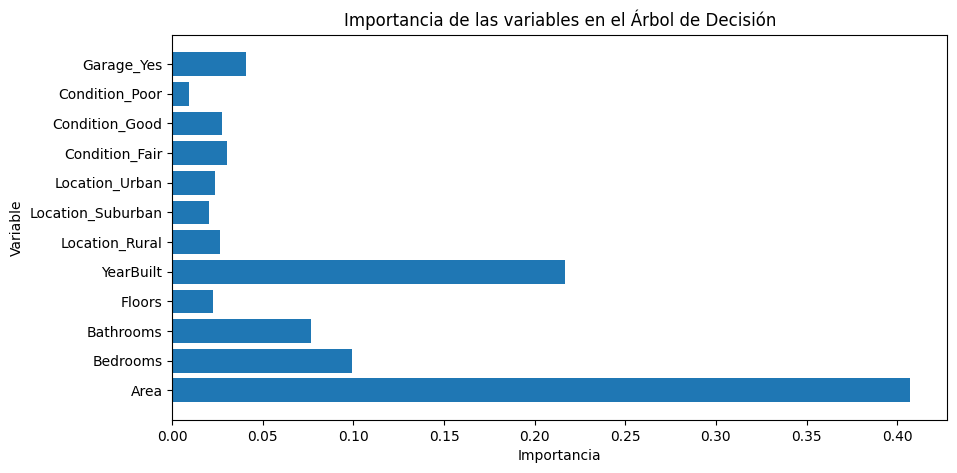

In [13]:

importancias = modelo.feature_importances_
features = X.columns

plt.figure(figsize=(10,5))
plt.barh(features, importancias)
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.title("Importancia de las variables en el Árbol de Decisión")
plt.show()


# 7. Pruebas

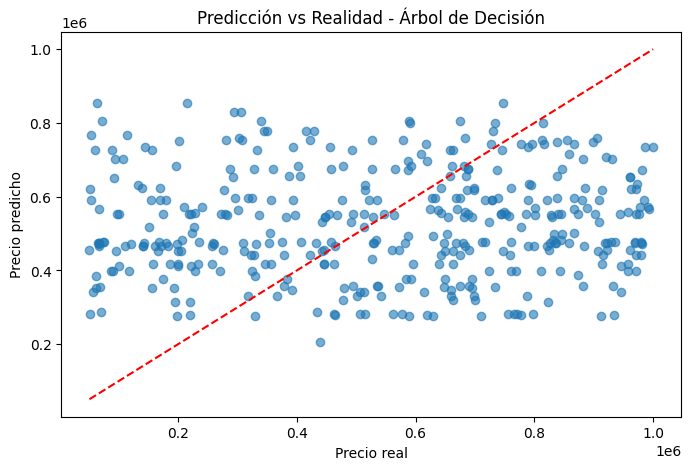

In [32]:


plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Precio real")
plt.ylabel("Precio predicho")
plt.title("Predicción vs Realidad - Árbol de Decisión")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.show()

In [31]:
# Seleccionar una casa al azar
indice = random.randint(0, len(X_test) - 1)
casa = X_test.iloc[indice]
precio_real = y_test.iloc[indice]

# Convertir la observación en DataFrame para que tenga nombres de columnas
casa_df = casa.to_frame().T

# Hacer la predicción
precio_predicho = modelo.predict(casa_df)[0]

# Calcular porcentaje de error
error_porcentaje = abs(precio_real - precio_predicho) / precio_real * 100

# Mostrar resultados
print("\nEjemplo de predicción")
print("-" * 40)
print("Características de la casa:\n")
print(casa)

print(f"\nPrecio real: {precio_real:,.0f}")
print(f"Precio predicho: {precio_predicho:,.0f}")
print(f"Error porcentual: {error_porcentaje:.2f}%")


Ejemplo de predicción
----------------------------------------
Características de la casa:

Area                  4988
Bedrooms                 2
Bathrooms                3
Floors                   2
YearBuilt             2022
Location_Rural       False
Location_Suburban     True
Location_Urban       False
Condition_Fair       False
Condition_Good        True
Condition_Poor       False
Garage_Yes           False
Name: 99, dtype: object

Precio real: 777,688
Precio predicho: 743,693
Error porcentual: 4.37%
